### Question 3 Part a (6.10 Newman)
The question asks us to use the relaxation method on a function and then examine the accuracy and other parameters of the function. 

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def Relax_Error(f_x,f_xprime,f_constant, func_deriv):
    return (f_x - f_xprime)/(1-(1/func_deriv(f_x,f_constant)))

In [3]:
def Offset_Exponential(f_x, f_constant):
    return 1 - np.exp(-1*f_constant*f_x)

In [4]:
def Exponential_Derivative(f_x, f_constant):
    return f_constant*np.exp(-1*f_constant*f_x)

In [5]:
def Root_Estimator(f_constant):
    f_x = 0.1
    counter = 0
    f_error = 1
    f_errorlimit = 10**(-6)                 
    while np.abs(f_error) > f_errorlimit:
        f_xnew = Offset_Exponential(f_x,f_constant)
        f_error = Relax_Error(f_x,f_xnew,f_constant,Exponential_Derivative)
        f_x = f_xnew
        counter += 1
    #print('The final answer is...',f_x)
    #print('COMPLETE')
    return f_x, counter

In [6]:
# Part A
f_constant = 2.0
f_x,i_steps  = Root_Estimator(f_constant)
print(f_x)

0.7968111529033527


In [7]:
a_constant = np.arange(0,3,0.01)
a_xval = np.empty(len(a_constant))
a_steps = np.empty(len(a_constant))
for i in range(len(a_constant)):
    print(a_constant[i])
    a_xval[i], a_steps[i] = Root_Estimator(a_constant[i])



0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0


/home/andrew/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.6300000000000001
1.6400000000000001
1.6500000000000001
1.6600000000000001
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.8800000000000001
1.8900000000000001
1.9000000000000001
1.9100000000000001
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2.0
2.0100000000000002
2.02
2.0300000000000002
2.04
2.05
2.06
2.07
2.08
2.09
2.1
2.11
2.12
2.13
2.14
2.15
2.16
2.17
2.18
2.19
2.2
2.21
2.22
2.23
2.24
2.25
2.2600000000000002
2.27
2.2800000000000002
2.29
2.3000000000000003
2.31
2.32
2.33
2.34
2.35
2.36
2.37
2.38
2.39
2.4
2.41
2.42
2.43
2.44
2.45
2.46
2.47
2.48
2.49


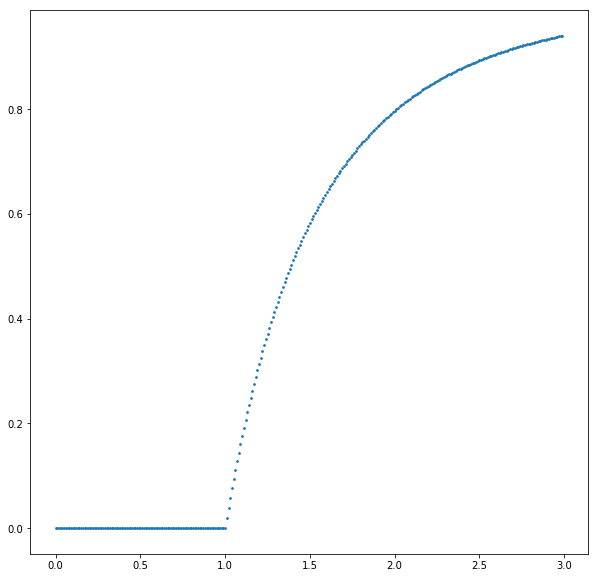

In [8]:
plt.figure(figsize= (10,10))
plt.scatter(a_constant,a_xval, s = 3)

### Question 3 Part B
Now Question 6.11B just wanted to adapt 6.10 code to count the number of steps it took for c = 2. For 6.11C we will compare the number of steps for relaxation method versus overrelaxation

In [10]:
def Root_Overestimator(f_constant):
    f_x = 2
    f_w = 0.75
    counter = 0
    f_error = 1
    f_errorlimit = 10**(-6)                 
    while np.abs(f_error) > f_errorlimit:
        f_xnew = (1+f_w)*Offset_Exponential(f_x,f_constant)-f_w*f_x
        f_error = Relax_Error(f_x,f_xnew,f_constant,Exponential_Derivative)
        f_x = f_xnew
        counter += 1
    #print('The final answer is...',f_x)
    #print('COMPLETE')
    return f_x, counter

In [11]:
# Part A
f_constant = 2.0
f_x,i_oversteps  = Root_Overestimator(f_constant)
print(f_x)

0.7968121237701278


In [12]:
print(i_steps, i_oversteps)

18 8


##### Question 6.11D
Yes, that would be 

## Question 6.13
The question wants us to solve another nonlinear equation, this time with the binary search function. 
The function is 
\begin{equation}
5e^{-x}+x-5 = 0
\end{equation}

In [85]:
def Binary_Search(function):
    f_errorlimit = 10**(-6)   
    f_error = 1
    #
    f_x1 =  -10
    f_x2 =  12
    while np.abs(f_error) > f_errorlimit:
        f_val1 = function(f_x1)
        f_val2 = function(f_x2)
        if np.sign(f_val1) != np.sign(f_val2):
            f_midpoint = (f_x1+f_x2)/2.0
            f_midval = function(f_midpoint)
        else:
            print('Something is very wrong')
        if np.sign(f_x1) != np.sign(f_midpoint):
            f_x2 = f_midpoint
        elif np.sign(f_x2) != np.sign(f_midpoint):
            f_x1 = f_midpoint
        else:
            print('Something is very wrong')
        f_error = np.abs(f_val1 - f_val2)
    return (f_x1 - f_x2)//2 
    

In [86]:
def forgotname(x):
    return 5 -5*np.exp(-1*x)

In [88]:
f_answer = Binary_Search(forgotname)
print(f_answer)

-1.0
